In [4]:
from osgeo import gdal
import numpy as np

# Read raster images

In [6]:
# Define the path that stores band 2 Landsat data
path=r"E:\Python_Tutorials\LandCoverClassification\LandsatData\LC08_L1TP_126046_20201112_20210317_01_T1_B2.TIF"
ds=gdal.Open(path)
# Get the first band
band=ds.GetRasterBand(1) # Index starts from 1 not 0

###### Count x, y size

In [9]:
print("Number of Columns: {}\nNumber of Rows: {}".format(ds.RasterXSize, ds.RasterYSize))

Number of Columns: 7551
Number of Rows: 7721


In [11]:
print(f"The number of bands: {ds.RasterCount}")

The number of bands: 1


###### Get raster properities

In [11]:
# Get geotransform
raster.GetGeoTransform()

(568185.0, 30.0, 0.0, 2353215.0, 0.0, -30.0)

In [15]:
print(f"Orginal (upper left) x,y: {raster.GetGeoTransform()[0],raster.GetGeoTransform()[3]}")

print(f"Spatial resolution: {raster.GetGeoTransform()[1]}")

print(f"Rotation: 0 means image is north-up direction: {raster.GetGeoTransform()[2]}")

Orginal (upper left) x,y: (568185.0, 2353215.0)
Spatial resolution: 30.0
Rotation: 0 means north-up direction: 0.0


In [16]:
# Get projection
import os
os.environ['PROJ_LIB'] = r'C:\Users\DELL\anaconda3\Library\share\proj'

raster.GetProjection()

'PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]'

- If it does not show cr, please try this <br>
import os <br>
os.environ['PROJ_LIB'] = r'C:\Users\DELL\anaconda3\Library\share\proj'

In [18]:
print("Data type of image:",gdal.GetDataTypeName(band.DataType))

Data type of image: UInt16


In [19]:
print("No value of image:",band.GetNoDataValue())

No value of image: None


# Some processing

In [22]:
data=band.ReadAsArray() # ReadAsArray(xofset,yofset,xsize,ysize)
#Print shape
data.shape

(7721, 7551)

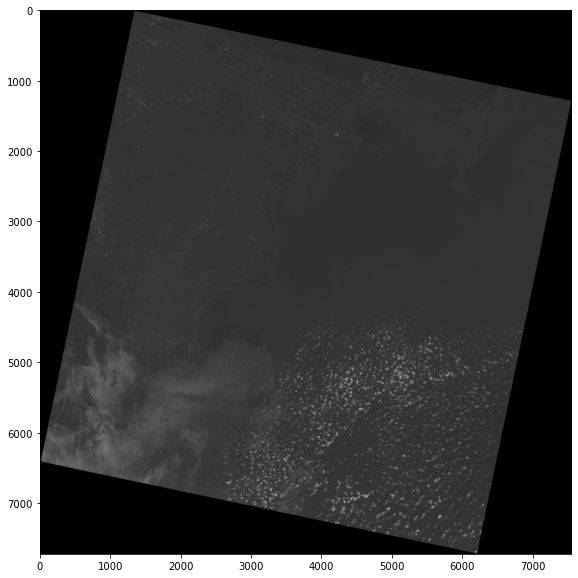

In [23]:
# Plot visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(data, cmap="gist_gray")
plt.show()

In [31]:
# Now we can close the file
del raster # or ds=None

# Write Array

For single raster layer

In [ ]:
# path=r"E:\Python_Tutorials\LandCoverClassification\LandsatData\LC08_L1TP_126046_20201112_20210317_01_T1_B2.TIF"

# raster=gdal.Open(path)
# # Get the first band
# band=raster.GetRasterBand(1)
# # Read band
# array=band.ReadAsArray()
# #Print shape
# array=array*-100000 (nếu đổi gdal.GDT_Int32 hoặc là một loại dữ liệu khác như float32)
# Write band
newRaster=r"E:\Python_Tutorials\LandCoverClassification\LandsatData\Test\band2.tif"
# Define number of col and rows
cols=raster.RasterXSize
rows=raster.RasterYSize
# Get driver
driver=gdal.GetDriverByName("GTiff")
# Create a raster empty and set geomtransform and project
outRaster=driver.Create(newRaster, cols, rows, 1, gdal.GDT_Int32)
outRaster.SetGeoTransform(raster.GetGeoTransform())
outRaster.SetProjection(raster.GetProjection())
# Write array to new band
outband=outRaster.GetRasterBand(1)
outband.WriteArray(array)
outband.FlushCache()
# ComputeStatistics()
#outband.ComputeStatistics(False) # False means actual statistics, not estimated
del outRaster
del outband

**Define a function to write a raster band**

In [74]:
path=r"E:\Python_Tutorials\LandCoverClassification\LandsatData\LC08_L1TP_126046_20201112_20210317_01_T1_B2.TIF"
# Define the path to store the new raster
newRaster=r"E:\Python_Tutorials\LandCoverClassification\Test\Test_Data\subset.tif"

def writeRaster(path, store):
    ds=gdal.Open(path)
    band=ds.GetRasterBand(1)
    driver=gdal.GetDriverByName("GTiff")
    outRaster=driver.Create(store, )
    

In [76]:
path=r"E:\Python_Tutorials\LandCoverClassification\LandsatData\LC08_L1TP_126046_20201112_20210317_01_T1_B2.TIF"
ds=gdal.Open(path)

data=ds.ReadAsArray()

In [77]:
subset=data[2000:3000,2000:3000]

subset

array([[ 9544,  9696,  9399, ...,  9689,  9725,  9615],
       [ 9468,  9442,  9287, ...,  9711,  9693,  9619],
       [ 9417,  9253,  9197, ...,  9732,  9648,  9569],
       ...,
       [10118, 10117, 10051, ...,  9307,  9265,  9216],
       [ 9985,  9904,  9894, ...,  9440,  9407,  9647],
       [10142,  9827,  9835, ...,  9835, 10018,  9555]], dtype=uint16)

In [83]:
newRaster=r"E:\Python_Tutorials\LandCoverClassification\Test\Test_Data\subset.tif"
driver=gdal.GetDriverByName("Gtiff")

outRaster=driver.Create(newRaster, 1000,1000, 1, gdal.GDT_Int32)

outRaster.SetGeoTransform(ds.GetGeoTransform())
outRaster.SetProjection(ds.GetProjection())

outband=outRaster.GetRasterBand(1)

outband.WriteArray(subset)

outband.FlushCache()

del outRaster
del outband

In [96]:
path=r"E:\Python_Tutorials\LandCoverClassification\LandsatData"
store=r"E:\Python_Tutorials\LandCoverClassification\LandsatData\Test"
import os 
count=1
for file in os.listdir(path):
    if file.endswith("TIF"):
        link=os.path.join(path,file)
        ds=gdal.Open(link)
        data=ds.ReadAsArray()
        subset=data[2000:3000,2000:3000]
        newRaster=os.path.join(store,"Landsat.TIF")
        driver=gdal.GetDriverByName("Gtiff")
        outRaster=driver.Create(newRaster, subset.shape[1],subset.shape[0], 12, gdal.GDT_Int32)
        outRaster.SetGeoTransform(ds.GetGeoTransform())
        outRaster.SetProjection(ds.GetProjection())
        outband=outRaster.GetRasterBand(count)
        count+=1
        outband.WriteArray(subset)
        outband.FlushCache()
        del outRaster
        del outband
        

AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

1000

# Writing multiple raster layers

In [4]:
import os 
import gdal
import numpy as np
def writeBands(path, storePath):
    listFile=[os.path.join(path, file) for file in os.listdir(path) if file.endswith(".TIF")]
    band1=listFile[0]
    readFile=gdal.Open(band1)
    cols=readFile.RasterXSize
    rows=readFile.RasterYSize
    transform=readFile.GetGeoTransform()
    proj=readFile.GetProjection()
    driver=gdal.GetDriverByName("GTiff")

    outRaster=driver.Create(storePath, cols, rows, len(listFile), gdal.GDT_UInt16)
    outRaster.SetGeoTransform(transform)
    outRaster.SetProject(proj)

    count=0
    for i in range(listFile):
        count+=1
        readBand=gdal.Open(listFile[i])
        array=myBand.ReadAsArray()
        
        outband=outRaster.GetRasterBand(count)
        outband.WriteArray(array)
        outband.FlushCache()
        del outRaster
        del outband

In [ ]:
path=r"E:\Python_Tutorials\LandCoverClassification\LandsatData\LC08_L1TP_126046_20201112_20210317_01_T1_B2.TIF"
storepath=r"E:\Python_Tutorials\LandCoverClassification\Test\band1.tif"

# writeBands(path, storepath)

In [50]:
value=data[2000:2007,2000:2007]

value

array([[9544, 9696, 9399, 9241, 9344, 9398, 9340],
       [9468, 9442, 9287, 9386, 9363, 9295, 9263],
       [9417, 9253, 9197, 9274, 9278, 9245, 9139],
       [9649, 9476, 9290, 9170, 9333, 9238, 9118],
       [9756, 9659, 9469, 9271, 9162, 9116, 9134],
       [9674, 9576, 9612, 9564, 9399, 9301, 9159],
       [9622, 9422, 9435, 9531, 9667, 9656, 9469]], dtype=uint16)

In [63]:
cols = value.shape[1]
rows=value.shape[0]

for col in range(0,cols,3):
    for row in range(0,rows,3):
        if not (col +3 >cols) and not (row+3>rows):
            print(value[col:col+3, row:row+3])
        else:
            print(value[col:col+3, row:row+3])

[[9544 9696 9399]
 [9468 9442 9287]
 [9417 9253 9197]]
[[9241 9344 9398]
 [9386 9363 9295]
 [9274 9278 9245]]
[[9340]
 [9263]
 [9139]]
[[9649 9476 9290]
 [9756 9659 9469]
 [9674 9576 9612]]
[[9170 9333 9238]
 [9271 9162 9116]
 [9564 9399 9301]]
[[9118]
 [9134]
 [9159]]
[[9622 9422 9435]]
[[9531 9667 9656]]
[[9469]]
